In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random
import networkx as nx
from networkx.algorithms.approximation import min_weighted_vertex_cover

def hill_climbing(graph_name, random_seed, max_time):
    
    random.seed(random_seed)

    if graph_name == 'power':
        opt = 2203
    if graph_name == 'star2':
        opt = 4542
    
    G = nx.Graph()
    lines = open('./'+graph_name+'.graph', 'r').readlines()
    nV, nE, _ = lines[0].split()
    for i in range(1, int(nV)+1):
        vs = lines[i].split()
        for v in vs:
            G.add_edge(i, int(v))

    start_time = time.time()

    # Find an initial vertex cover

    C = []
    update_times = []
    update_results = []

    H = G.copy()

    while H.size():
        max_grade = max(H.degree, key=lambda x: x[1])[1]
        max_grade_nodes_list = [node[0] for node in H.degree if node[1] == max_grade]

        n = max_grade_nodes_list[0]

        H.remove_node(n)
        C.append(n)

    C_new = C

    lst = list(G.edges)
    
    found_time = -1

    while ((time.time() - start_time) < max_time):

        c = 0
        for u,v in G.edges:
            if u not in C and v not in C:
                c = -1
                
        if c == 0:

            # C is a vertex cover, trace the improvements

            l = len(C)
            
            C_new = C.copy()
            C.pop(random.randrange(len(C)))


        if len(C) == 0:
            break
        # select exiting vertex

        values = [0 for _ in range(len(C))]
        dic = dict(zip(C, values))
        for u,v in G.edges:
            if u in C and v not in C:
                dic[u] += 1
            if u not in C and v in C:
                dic[v] += 1
        a = min(dic, key=dic.get)

        C.remove(a)

        # select entering vertex
        random.shuffle(lst)
        for u,v in lst:
            if u not in C and v not in C:
                C.append(v)
                break
                
    l = len(C_new)      
    q = (l-opt)/opt
    
    return q

[0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502]
[0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502]
[0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029722589167767502, 0.029722589167767502, 0.029722589167767502]
[0.02906208718626156, 0.02928225451343021, 0.02928225451343021, 0.02928225451343021, 0.02928225451343021, 0.02928225451343021, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855, 0.029502421840598855]
[0.028401585204755615, 0.028621752531924262, 0.028841919859092912, 0.028841919859092912, 0.02906208718626156, 0.0290620871

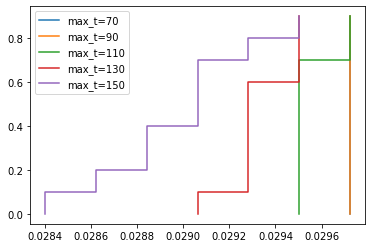

In [2]:
maxt_lst = [70, 90, 110, 130, 150]
num_iter = 10
graph_name = 'star2'

for max_time in maxt_lst:
    q_lst = []
    for i in range(num_iter):
        random_seed = i
        q = hill_climbing(graph_name, random_seed, max_time)
        q_lst.append(q)
    
    q_lst.sort()
    
    l = len(q_lst)
    prob_lst = [(i-1)/num_iter for i in range(1,l+1)]
    plt.step(q_lst, prob_lst, label='max_t='+str(max_time))
    print(q_lst)
plt.legend(loc='best')
plt.show()